In [115]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import metrics

# Loading data set

In [116]:
df=pd.read_csv('titanic_dataset.csv')

In [117]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Make ‘PassengerId’ as the index column

In [118]:
df.set_index(df['PassengerId'], inplace=True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,,
1,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Check the basic details of the dataset

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 90.5+ KB


In [120]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [121]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# Fill in all the missing values present in all the columns in the dataset

In [122]:
#Age has 177 missing values

In [123]:
#Filling missing values in age

In [124]:
df['Age'].median()

28.0

In [125]:
df['median_age'] = df['Age'].fillna(df['Age'].median())

In [126]:
random_age_values = df['Age'].dropna().sample(df['Age'].isnull().sum())
random_age_values.index = df[df['Age'].isnull()].index
df['random_age'] = df['Age'].fillna(random_age_values)

In [127]:
df['Age'].fillna(random_age_values, inplace=True)

In [128]:
df['Age'].isnull().sum()

0

In [129]:
#cabin has 687 missing values
#Filling missing values in cabin

In [130]:
df['Cabin'].nunique()
df['Cabin'].fillna('N/A', inplace=True)
df['Cabin'].isnull().sum()

0

In [131]:
#Filling missing values in embarked

In [132]:
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df['Embarked'].isnull().sum()

0

In [133]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
median_age     0
random_age     0
dtype: int64

# Check and handle outliers in at least 3 columns in the dataset

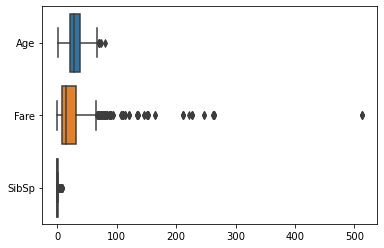

In [134]:
sns.boxplot(data=df[['Age', 'Fare', 'SibSp']], orient='h')
plt.show()

In [135]:
df_with_outliers = df.copy(deep=True)

In [136]:
def outlier_handling(data):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    q_limit = 1.5 * iqr
    upper_limit = q3 + q_limit
    lower_limt = q1 - q_limit
    outliers = data.loc[(data < lower_limt) ^ (data > upper_limit)].tolist()
    idx = data.loc[(data < lower_limt) ^ (data > upper_limit)].index.tolist()
    return outliers, idx

In [137]:
fare_outlier_list, fare_outlier_index = outlier_handling(df['Fare'])
age_outlier_list, age_outlier_index = outlier_handling(df['Age'])
sibsp_oulliers, sibsp_outlier_index = outlier_handling(df['SibSp'])

In [138]:
print(len(fare_outlier_index), len(age_outlier_index), len(sibsp_outlier_index))

116 8 46


In [139]:
new_idx = sibsp_outlier_index + age_outlier_index + fare_outlier_index
len(new_idx)

170

In [140]:
new_idx = set(new_idx)

In [141]:
len(new_idx)

159

In [142]:
index_to_remove = list(new_idx)

In [143]:
len(index_to_remove)

159

In [144]:
df.drop(index=index_to_remove, inplace=True)

In [145]:
df.shape

(732, 14)

# Do min max scaling on the feature set (Take ‘Survived’ as target)

In [146]:
df.drop('Name',axis=1,inplace=True)
df.drop('Ticket',axis=1,inplace=True)

In [147]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,median_age,random_age
PassengerId,,,,,,,,,,,,
1,1,0,3,male,22.0,1,0,7.2500,N/A,S,22.0,22.0
3,3,1,3,female,26.0,0,0,7.9250,N/A,S,26.0,26.0
4,4,1,1,female,35.0,1,0,53.1000,C123,S,35.0,35.0
5,5,0,3,male,35.0,0,0,8.0500,N/A,S,35.0,35.0
6,6,0,3,male,35.0,0,0,8.4583,N/A,Q,28.0,35.0


In [148]:
y=df['Survived']
x=df.drop('Survived',axis=1)

In [149]:
x.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,median_age,random_age
count,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000
mean,449.931694,2.460383,29.670082,0.275956,0.289617,17.124310,29.268784,29.670082
std,258.146266,0.739589,13.172627,0.507477,0.756731,13.400853,11.692538,13.172627
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.420000,0.420000
25%,221.750000,2.000000,21.000000,0.000000,0.000000,7.893725,23.000000,21.000000
50%,454.000000,3.000000,28.000000,0.000000,0.000000,11.500000,28.000000,28.000000
75%,671.250000,3.000000,38.000000,0.000000,0.000000,25.926050,34.000000,38.000000
max,891.000000,3.000000,66.000000,2.000000,6.000000,65.000000,66.000000,66.000000


In [150]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

In [151]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)
lr=linear_model.LinearRegression()
model=lr.fit(x_train,y_train)
predictions=model.predict(x_test)
print('MSE is : ',mean_squared_error(y_test,predictions))
print('r squared value is : ',r2_score(y_test,predictions))

ValueError: could not convert string to float: 'male'